In [1]:
library(dplyr)
# Baka <- read.delim("Baka_meqtls_all_tested.txt", sep=",", header=FALSE)
# Baka$cpg <- sapply(strsplit(Baka$V1, split="_"), function(x) strsplit(x[2], split=".txt")[[1]][1])

# KHS <- read.delim("KHS_meqtls_all_tested.txt", sep=",", header=FALSE)
# KHS$cpg <- sapply(strsplit(KHS$V1, split="_"), function(x) strsplit(x[2], split=".txt")[[1]][1])

# Himba <- read.delim("Himba_meqtls_all_tested.txt", sep=",", header=FALSE)
# Himba$cpg <- sapply(strsplit(Himba$V1, split="_"), function(x) strsplit(x[2], split=".txt")[[1]][1])




Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
#for each significant snp test the lead snp of the other pop
##load significant meqtls
library(dplyr)
load("meqtls.RData")




In [3]:
Baka <- Baka_meqtls %>%
    group_by(cpg) %>%
    filter(V4 == min(V4)) %>%
    slice(1) %>%  
    ungroup()

KHS <- KHS_meqtls %>%
    group_by(cpg) %>%
    filter(V4 == min(V4)) %>%
    slice(1) %>%  
    ungroup()

Himba <- Himba_meqtls %>%
    group_by(cpg) %>%
    filter(V4 == min(V4)) %>%
    slice(1) %>%  
    ungroup()

head(Himba)

V1,V2,V3,V4,cpg,snp
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
cpg_cg00000721.txt_meqtl.ps,6:25249638:A:G,0.0008015411,1.947313e-04,cg00000721,6:25249638
cpg_cg00000884.txt_meqtl.ps,4:154519109:A:T,0.0933632199,5.106087e-08,cg00000884,4:154519109
cpg_cg00001126.txt_meqtl.ps,3:81734097:G:C,-0.0702546884,1.422969e-05,cg00001126,3:81734097
cpg_cg00001593.txt_meqtl.ps,1:170554572:T:A,0.1714544723,9.973968e-05,cg00001593,1:170554572
cpg_cg00001784.txt_meqtl.ps,4:185434005:C:T,0.0157869687,4.057182e-09,cg00001784,4:185434005
cpg_cg00001930.txt_meqtl.ps,18:60116804:A:G,0.0049876871,2.770890e-06,cg00001930,18:60116804


In [4]:

Himba_Baka <- Himba %>%
    inner_join(Baka, by = c("cpg", "snp"), suffix = c("_Himba", "_Baka")) %>% select(cpg, Himba_snp = V2_Himba, Baka_snp = V2_Baka, Himba_weight = V3_Himba, Baka_weight = V3_Baka)


Himba_KHS <- Himba %>%
    inner_join(KHS, by = c("cpg", "snp"), suffix = c("_Himba", "_KHS")) %>% select(cpg, Himba_snp = V2_Himba, KHS_snp = V2_KHS, Himba_weight = V3_Himba, KHS_weight = V3_KHS)

               
Baka_KHS <- Baka %>%
    inner_join(KHS, by = c("cpg", "snp"), suffix = c("_Baka", "_KHS")) %>% select(cpg, Baka_snp = V2_Baka, KHS_snp = V2_KHS, Baka_weight = V3_Baka, KHS_weight = V3_KHS)



In [5]:
Himba_Baka

cpg,Himba_snp,Baka_snp,Himba_weight,Baka_weight
<chr>,<chr>,<chr>,<dbl>,<dbl>
cg00024416,22:24240340:G:A,22:24240340:A:G,0.12261300,-0.13470937
cg00199047,8:1648035:G:A,8:1648035:G:A,0.03062755,0.05326332
cg00322062,15:43073637:T:G,15:43073637:T:G,0.06160618,0.02856507
cg00355656,1:229660791:G:A,1:229660791:G:A,-0.09298507,-0.08267795
cg00509249,6:109614844:C:T,6:109614844:C:T,0.02917613,0.04896331
cg00561739,5:1825748:G:A,5:1825748:G:A,0.15470483,0.16711407
cg00614959,4:723882:C:T,4:723882:C:T,0.20614757,0.20956223
cg00979803,17:38644752:G:A,17:38644752:G:A,0.28653540,0.20214801
cg01317586,15:89921477:A:G,15:89921477:A:G,-0.05031104,-0.13982319


In [6]:

Himba_Baka <- Himba_Baka %>%
  mutate(
    Himba_weight = if_else(Himba_snp != Baka_snp, abs(Himba_weight), Himba_weight),
    Baka_weight = if_else(Himba_snp != Baka_snp, abs(Baka_weight), Baka_weight)
  )


Himba_KHS <- Himba_KHS %>%
  mutate(
    Himba_weight = if_else(Himba_snp != KHS_snp, abs(Himba_weight), Himba_weight),
    KHS_weight = if_else(Himba_snp != KHS_snp, abs(KHS_weight), KHS_weight)
  )

Baka_KHS <- Baka_KHS %>%
  mutate(
    Baka_weight = if_else(Baka_snp != KHS_snp, abs(Baka_weight), Baka_weight),
    KHS_weight = if_else(Baka_snp != KHS_snp, abs(KHS_weight), KHS_weight)
  )
nrow(Himba_Baka)
nrow(Himba_KHS)
nrow(Baka_KHS)
Himba_Baka

[1] 242

[1] 244

[1] 309

cpg,Himba_snp,Baka_snp,Himba_weight,Baka_weight
<chr>,<chr>,<chr>,<dbl>,<dbl>
cg00024416,22:24240340:G:A,22:24240340:A:G,0.12261300,0.13470937
cg00199047,8:1648035:G:A,8:1648035:G:A,0.03062755,0.05326332
cg00322062,15:43073637:T:G,15:43073637:T:G,0.06160618,0.02856507
cg00355656,1:229660791:G:A,1:229660791:G:A,-0.09298507,-0.08267795
cg00509249,6:109614844:C:T,6:109614844:C:T,0.02917613,0.04896331
cg00561739,5:1825748:G:A,5:1825748:G:A,0.15470483,0.16711407
cg00614959,4:723882:C:T,4:723882:C:T,0.20614757,0.20956223
cg00979803,17:38644752:G:A,17:38644752:G:A,0.28653540,0.20214801
cg01317586,15:89921477:A:G,15:89921477:A:G,-0.05031104,-0.13982319


Warning message in geom_text(aes(x = max(Himba_weight) - 0.25, y = min(Baka_weight), :
"All aesthetics have length 1, but the data has 242 rows.
i Please consider using `annotate()` or provide this layer with data containing a single row."
Warning message in geom_text(aes(x = max(Baka_weight) - 0.25, y = min(KHS_weight), :
"All aesthetics have length 1, but the data has 309 rows.
i Please consider using `annotate()` or provide this layer with data containing a single row."
Warning message in geom_text(aes(x = max(Himba_weight) - 0.25, y = min(KHS_weight), :
"All aesthetics have length 1, but the data has 244 rows.
i Please consider using `annotate()` or provide this layer with data containing a single row."


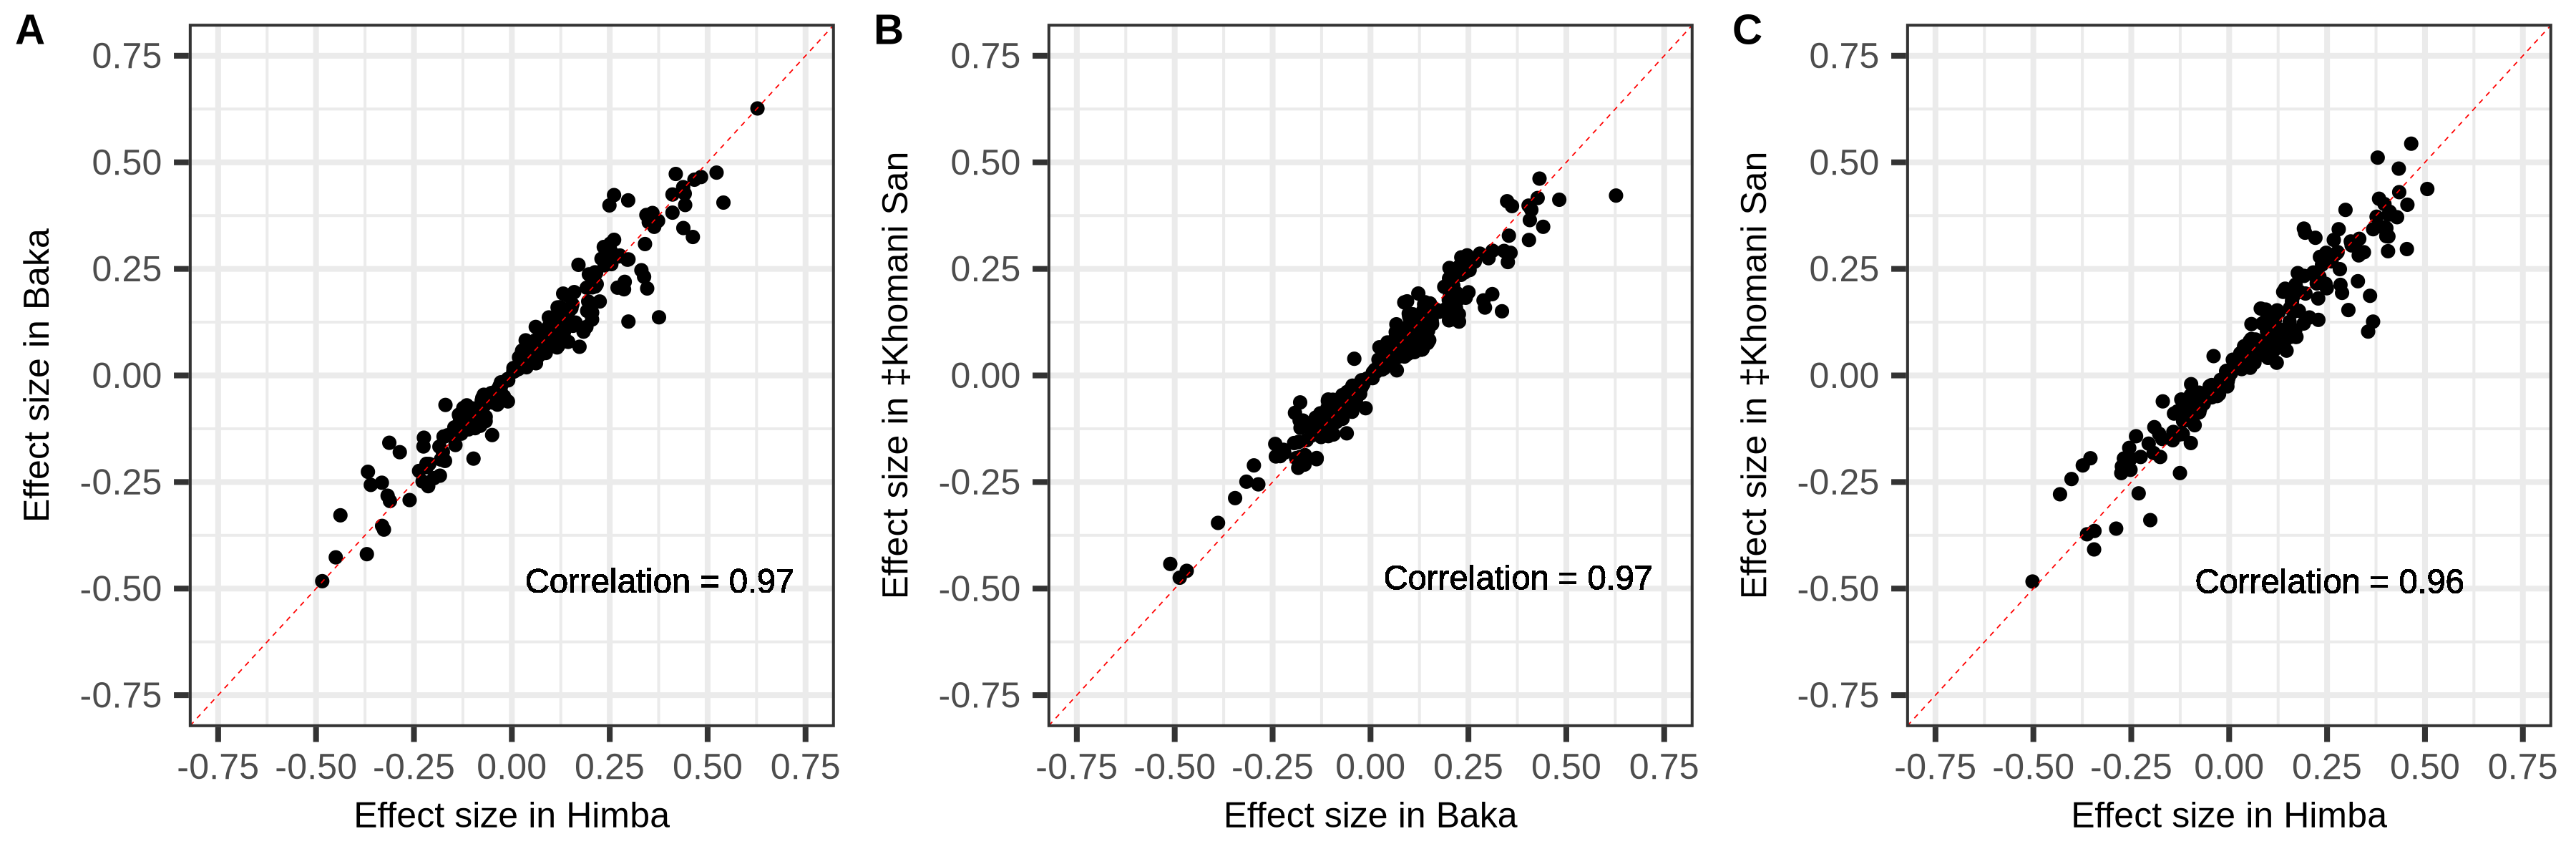

In [9]:
library(ggplot2)
options(repr.plot.width =10, repr.plot.height = 10)

#Himba_Baka <- Himba_Baka[Himba_Baka$Himba_weight < 100, ]

# Calculate the correlation coefficient and p-value for Himba_Baka
correlation_himba_baka <- cor.test(Himba_Baka$Himba_weight, Himba_Baka$Baka_weight)
# Create the scatter plot for Himba_Baka

scatter_plot_himba_baka <- ggplot(Himba_Baka, aes(x = Himba_weight, y = Baka_weight)) +
  geom_point(size = 5, color = "black") +  # Black points
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +  # Add one-to-one line
  labs(x = "Effect size in Himba", y = "Effect size in Baka") +  # Label axes
      theme_bw(base_size = 50) + 
  theme(legend.position = "none",
         axis.text = element_text(size = 30),
        axis.title = element_text(size = 30, margin = margin(r = 10)),
        plot.title = element_text(size = 50 ), plot.margin = margin(t = 20, r = 20, b = 20, l = 20)) + geom_text(aes(x = max(Himba_weight)-.25, y = min(Baka_weight), 
                label = paste("Correlation =", round(correlation_himba_baka$estimate[[1]], 2))),
            size = 10, color = "black")   + # Set colors for Model  
scale_x_continuous(limits = c(-.75, .75), breaks = seq(-.75 ,.75, by = 0.25)) +  # Set x-axis limits and breaks
scale_y_continuous(limits = c(-.75, .75), breaks = seq(-.75, .75, by = 0.25)) 


correlation_himba_khs <- cor.test(Himba_KHS$Himba_weight, Himba_KHS$KHS_weight)
# Create the scatter plot for Himba_Baka

scatter_plot_himba_khs <- ggplot(Himba_KHS, aes(x = Himba_weight, y = KHS_weight)) +
  geom_point(size = 5, color = "black") +  # Black points
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +  # Add one-to-one line
  labs(x = "Effect size in Himba", y = "Effect size in \u2021Khomani San") +  # Label axes
      theme_bw(base_size = 50) + 
  theme(legend.position = "none",
         axis.text = element_text(size = 30),
        axis.title = element_text(size = 30, margin = margin(r = 10)),
        plot.title = element_text(size = 50 ), plot.margin = margin(t = 20, r = 20, b = 20, l = 20)) +geom_text(aes(x = max(Himba_weight)-.25, y = min(KHS_weight), 
                label = paste("Correlation =", round(correlation_himba_khs$estimate[[1]], 2))),
            size = 10, color = "black")   + # Set colors for Model  
scale_x_continuous(limits = c(-.75, .75), breaks = seq(-.75 ,.75, by = 0.25)) +  # Set x-axis limits and breaks
scale_y_continuous(limits = c(-.75, .75), breaks = seq(-.75, .75, by = 0.25)) 


correlation_baka_khs <- cor.test(Baka_KHS$Baka_weight, Baka_KHS$KHS_weight)
# Create the scatter plot for Himba_Baka

scatter_plot_baka_khs <- ggplot(Baka_KHS, aes(x = Baka_weight, y = KHS_weight)) +
  geom_point(size = 5, color = "black") +  # Black points
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +  # Add one-to-one line
  labs(x = "Effect size in Baka", y = "Effect size in \u2021Khomani San") +  # Label axes
      theme_bw(base_size = 50) + 
  theme(legend.position = "none",
         axis.text = element_text(size = 30),
        axis.title = element_text(size = 30, margin = margin(r = 10)),
        plot.title = element_text(size = 50 ), plot.margin = margin(t = 20, r = 20, b = 20, l = 20)) +
  # Increase font size of text elements
  geom_text(aes(x = max(Baka_weight)-.25, y = min(KHS_weight), 
                label = paste("Correlation =", round(correlation_baka_khs$estimate[[1]], 2))),
            size = 10, color = "black") + # Set colors for Model  
scale_x_continuous(limits = c(-.75, .75), breaks = seq(-.75 ,.75, by = 0.25)) +  # Set x-axis limits and breaks
scale_y_continuous(limits = c(-.75, .75), breaks = seq(-.75, .75, by = 0.25)) 


options(repr.plot.width = 30, repr.plot.height = 10)
library(cowplot)
# Print the scatter plots side by side
combined_plot3 <- plot_grid(scatter_plot_himba_baka, scatter_plot_baka_khs, scatter_plot_himba_khs, 
          ncol = 3, labels = c("A", "B", "C"), label_size = 35)

combined_plot3
save("combined_plot3", file="meqtl_effect_corrs.RData")